In [39]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import itertools  # Add this import at the beginning
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [40]:
df = pd.read_csv('/Users/akanshamalviya/Documents/Project/Data Science Job Analysis/processed_final_data.csv')

In [41]:
df

,Title,Company_Name,Location,Via,Min_Salary,Max_Salary,Programming_Languages,Visualization_Tools,Databases_and_Big_Data_Tools,ML_and_Data_Science_Libraries,Cloud_Services,Education,Experience,Soft_Skills,Work_Mode,job_position,level,State,Min_Salary_Outlier,Max_Salary_Outlier
0,Data Scientist,Apple,"Austin, TX",Careers At Apple,122727.0,185374.0,"sql, python",tableau,mysql,"tensorflow, pytorch, scikit-learn","docker, kubernetes",bachelor,5,"communication skills, collaboration, leadership",hybrid,Data Scientist,Unspecified,TX,False,False
1,Data Scientist,Select Minds LLC,"Dallas, TX",LinkedIn,122727.0,185374.0,"r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,3,communication skills,hybrid,Data Scientist,Unspecified,TX,False,False
2,Principal Data Scientist,MD Anderson,"Houston, TX",MD Anderson - MD Anderson Cancer Center,143024.0,216802.0,python,tableau,spark,"tensorflow, pytorch, scikit-learn",aws,bachelor,5,"decision-making, collaboration, collaboration,...",remote,Data Scientist,Senior-level,TX,False,False
3,Data Scientist - Causal Discovery,CPChem,"The Woodlands, TX",Careers At Chevron Phillips - Chevron Phillips...,122727.0,185374.0,"go, r, sql, python",tableau,spark,"tensorflow, pytorch, scikit-learn","microsoft azure, aws",master,3,"communication skills, decision-making",hybrid,Data Scientist,Unspecified,TX,False,False
4,Senior Data Scientist-Remote,Baker Hughes,"Houston, TX (+1 other)",Baker Hughes,104000.0,150000.0,"scala, r, python",tableau,spark,"tensorflow, keras",aws,master,5,communication skills,remote,Data Scientist,Senior-level,TX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4115,AIML - Staff Machine Learning Engineer/Scienti...,Apple,"Seattle, WA",Careers At Apple,166600.0,296300.0,"go, java, r, python",tableau,spark,"tensorflow, pytorch",aws,bachelor,5,interpersonal skills,hybrid,Machine Learning Engineer,Senior-level,WA,False,False
4116,Distinguished Machine Learning Engineer,Capitalone,"McLean, VA",ZipRecruiter,135741.0,221290.0,"scala, python","power bi, tableau",spark,"numpy, pandas, scikit-learn",aws,bachelor,3,"collaboration, leadership",hybrid,Machine Learning Engineer,Unspecified,VA,False,False
4117,"Machine Learning Cloud Engineer, Information S...",Apple Inc.,"Washington, DC",Jooble,166600.0,250600.0,"go, java, python","power bi, tableau",spark,tensorflow,"docker, kubernetes, aws",bachelor,5,collaboration,hybrid,Machine Learning Engineer,Unspecified,DC,False,False
4118,"Machine Learning Engineer, TikTok Ads Core- Tr...",TikTok,"Seattle, WA",LinkedIn,137750.0,237500.0,python,"power bi, tableau",spark,"tensorflow, pytorch",aws,bachelor,5,creativity,hybrid,Machine Learning Engineer,Unspecified,WA,False,False


In [24]:
df.columns.values.tolist()

['Title',
 'Company_Name',
 'Location',
 'Via',
 'Min_Salary',
 'Max_Salary',
 'Programming_Languages',
 'Visualization_Tools',
 'Databases_and_Big_Data_Tools',
 'ML_and_Data_Science_Libraries',
 'Cloud_Services',
 'Education',
 'Experience',
 'Soft_Skills',
 'Work_Mode',
 'job_position',
 'level',
 'State',
 'Min_Salary_Outlier',
 'Max_Salary_Outlier']

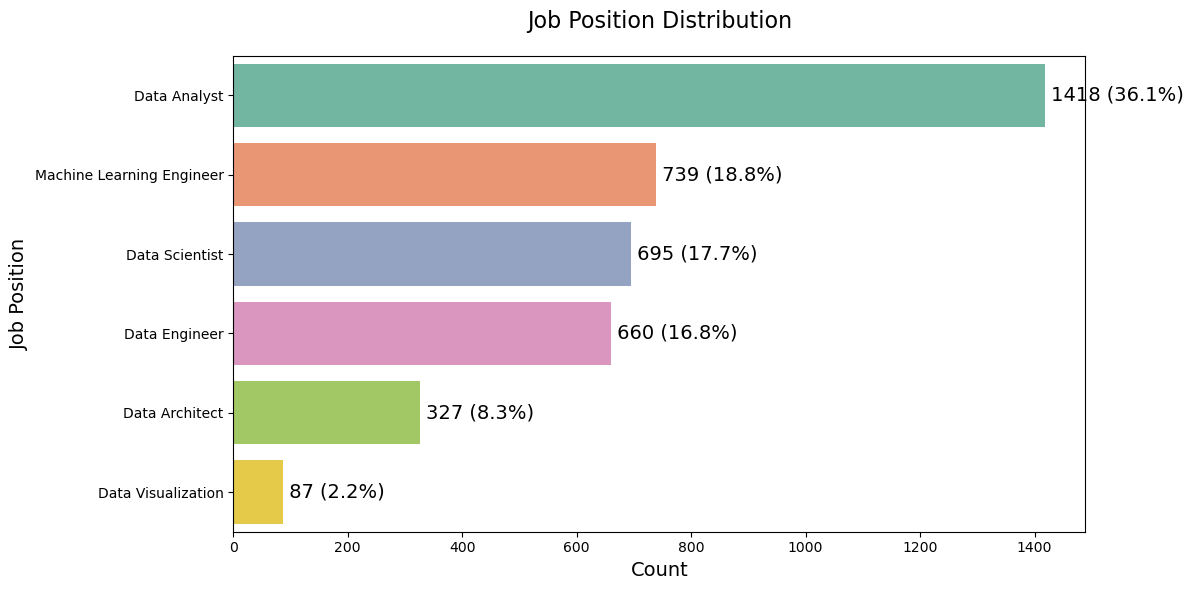

In [29]:
# Get job counts excluding 'Other'
job_counts = df['job_position'].value_counts()
job_counts = job_counts[job_counts.index != 'Other']

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
sns.barplot(x=job_counts.values, y=job_counts.index, palette='Set2')

# Customize the plot
plt.title('Job Position Distribution', fontsize=16, pad=20)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Job Position', fontsize=14)

# Adding percentage labels
total = job_counts.sum()
for index, value in enumerate(job_counts.values):
    percentage = f'{(value / total) * 100:.1f}%'
    plt.text(value, index, f' {value} ({percentage})', va='center', fontsize=14)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


The distribution suggests:

Entry-level positions (Data Analyst) are most abundant
Technical specialized roles (ML Engineer, Data Scientist, Data Engineer) each represent roughly similar proportions
Architecture and visualization roles are less common, possibly due to their more specialized nature



**Data Analyst** dominates the job market with 1,418 positions (36.1% of total positions), making it the most in-demand role.

**Machine Learning Engineer** is the second most common position with 739 openings (18.8% of total positions).

**Data Scientist** follows closely with 695 positions (17.7% of total positions).

**Data Engineer** represents 660 positions (16.8% of total positions).

**Data Architect** shows moderate demand with 327 positions (8.3% of total positions).

**Data Visualization** has the lowest number of openings with 87 positions (2.2% of total positions).




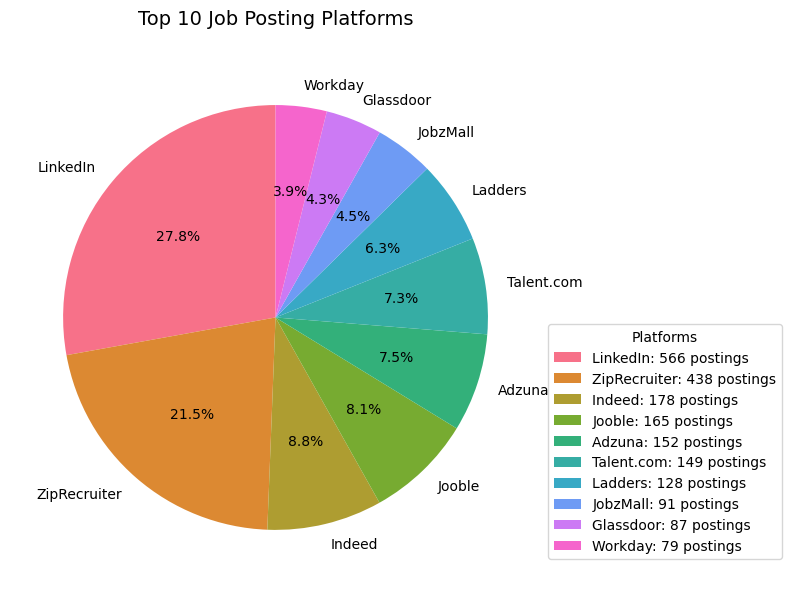


Detailed Platform Usage Statistics:
LinkedIn: 566 postings (13.7%)
ZipRecruiter: 438 postings (10.6%)
Indeed: 178 postings (4.3%)
Jooble: 165 postings (4.0%)
Adzuna: 152 postings (3.7%)
Talent.com: 149 postings (3.6%)
Ladders: 128 postings (3.1%)
JobzMall: 91 postings (2.2%)
Glassdoor: 87 postings (2.1%)
Workday: 79 postings (1.9%)


In [20]:
# Get the count of job postings by platform (Via column)
platform_counts = df['Via'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('husl', n_colors=len(platform_counts))

# Plot pie chart
wedges, texts, autotexts = plt.pie(
    platform_counts.values,
    labels=platform_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

# Add a legend sorted by descending count
plt.legend(
    wedges,
    [f"{label}: {count} postings" for label, count in platform_counts.items()],
    title="Platforms",
    loc="upper left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Add title
plt.title('Top 10 Job Posting Platforms', fontsize=14, pad=20)

# Show plot
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Platform Usage Statistics:")
for platform, count in platform_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{platform}: {count} postings ({percentage:.1f}%)")

**Job Platform Distribution**

Major Platforms
LinkedIn dominates with 27.8% (565 postings)
ZipRecruiter follows with 21.5% (438 postings)
Indeed holds 8.8% (177 postings)


Mid-Tier Platforms
Jooble accounts for 8.1% (164 postings)
Adzuna represents 7.5% (151 postings)
Talent.com shows 7.3% (149 postings)
Ladders comprises 6.3% (127 postings)


Lower-Volume Platforms
JobzMall has 4.5% (91 postings)
Glassdoor shows 4.3% (86 postings)
Workday represents 3.9% (79 postings)


**Key Observations**
The top two platforms (LinkedIn and ZipRecruiter) account for nearly half (49.3%) of all job postings
There's a significant drop between the second and third platforms (21.5% to 8.8%)
The bottom five platforms collectively represent about 26.3% of the total postings
The distribution shows a clear hierarchy in platform preference among employers

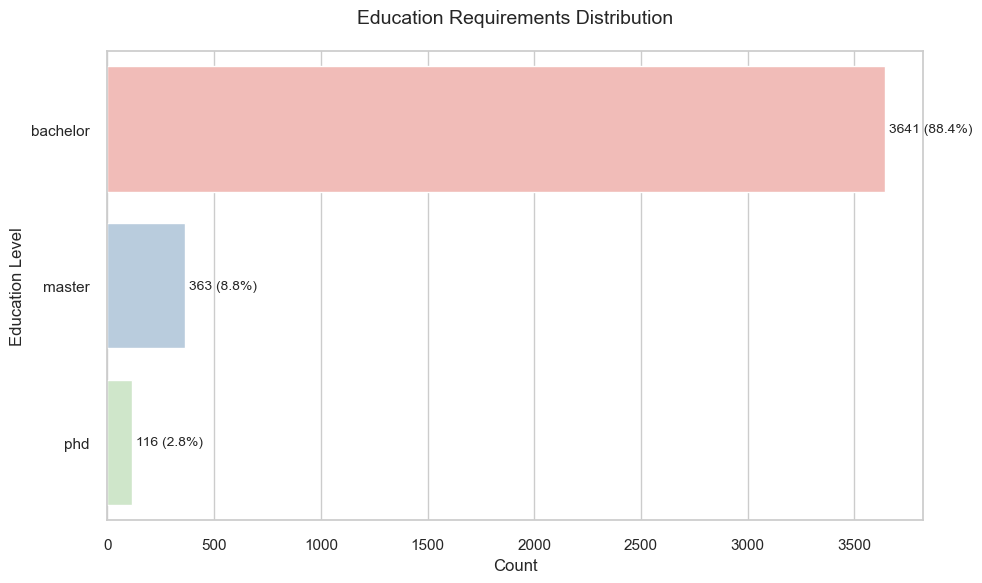

In [ ]:
# Remove unknown/unspecified education categories
df_cleaned = df[df['Education'].isin(['bachelor', 'master', 'phd'])]

# Create figure
plt.figure(figsize=(10, 6))

# Get education counts
edu_counts = df_cleaned['Education'].value_counts()

# Create bar plot
sns.barplot(x=edu_counts.values, y=edu_counts.index, palette='Pastel1')

# Customize the plot
plt.title('Education Requirements Distribution', fontsize=14, pad=20)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)

# Adding percentage labels
total = edu_counts.sum()
for index, value in enumerate(edu_counts.values):
    percentage = f'{(value / total) * 100:.1f}%'
    plt.text(value, index, f' {value} ({percentage})', va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Education Level Distribution**
Bachelor's Degree: Overwhelmingly dominant with 3,641 positions (88.4% of total requirements)
Master's Degree: Second most common with 363 positions (8.8% of total requirements)
PhD: Least required with 116 positions (2.8% of total requirements)


**Key Insights**
The vast majority of data-related positions accept candidates with bachelor's degrees
Advanced degrees (Master's and PhD combined) are required for only 11.6% of positions
The significant preference for bachelor's degrees suggests that formal education beyond undergraduate level is not a mandatory requirement for most data-related roles

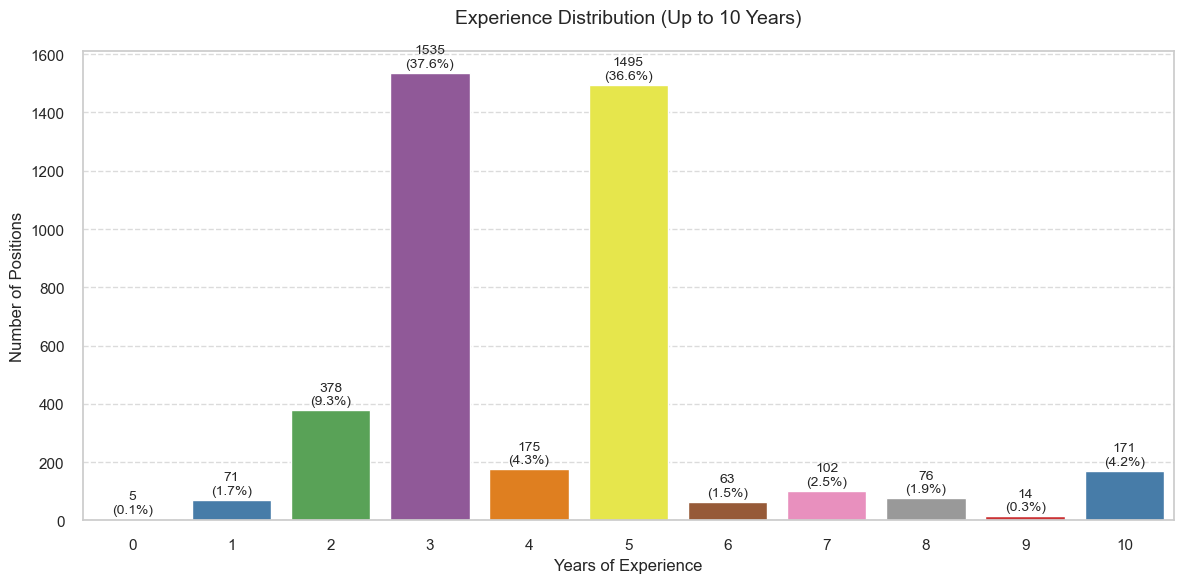

In [ ]:
# Filter experience <= 10 years
df_filtered = df[df['Experience'] <= 10]

# Get experience counts and sort by years
exp_counts = df_filtered['Experience'].value_counts().sort_index()

# Create figure
plt.figure(figsize=(12, 6))

# Create bar plot
bars = sns.barplot(x=exp_counts.index.astype(str), y=exp_counts.values, palette='Set1')

# Customize the plot
plt.title('Experience Distribution (Up to 10 Years)', fontsize=14, pad=20)
plt.xlabel('Years of Experience', fontsize=12)
plt.ylabel('Number of Positions', fontsize=12)

# Adding count and percentage labels
total = exp_counts.sum()
for index, value in enumerate(exp_counts.values):
    percentage = (value / total) * 100
    plt.text(index, value + 10, f'{value}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontsize=10)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Experience Level Distribution**

High Demand Experience Levels
3 years: Highest demand with 1,535 positions (37.6%)
5 years: Second highest with 1,495 positions (36.6%)
2 years: Third with 378 positions (9.3%)
    
Mid-Range Experience
4 years: 175 positions (4.3%)
10 years: 171 positions (4.2%)
7 years: 102 positions (2.5%)
    
Entry Level and Senior Positions
1 year: 71 positions (1.7%)
6 years: 63 positions (1.5%)
8 years: 76 positions (1.9%)
9 years: Only 14 positions (0.3%)
0 years: Minimal with 5 positions (0.1%)
    
    
**Key Observations**

The majority of positions (74.2%) require 3-5 years of experience
Entry-level positions (0-1 years) are relatively scarce (1.8%)
Senior-level positions (8-10 years) represent a small portion (6.4%)
There's a clear preference for mid-level professionals with 2-5 years of experience

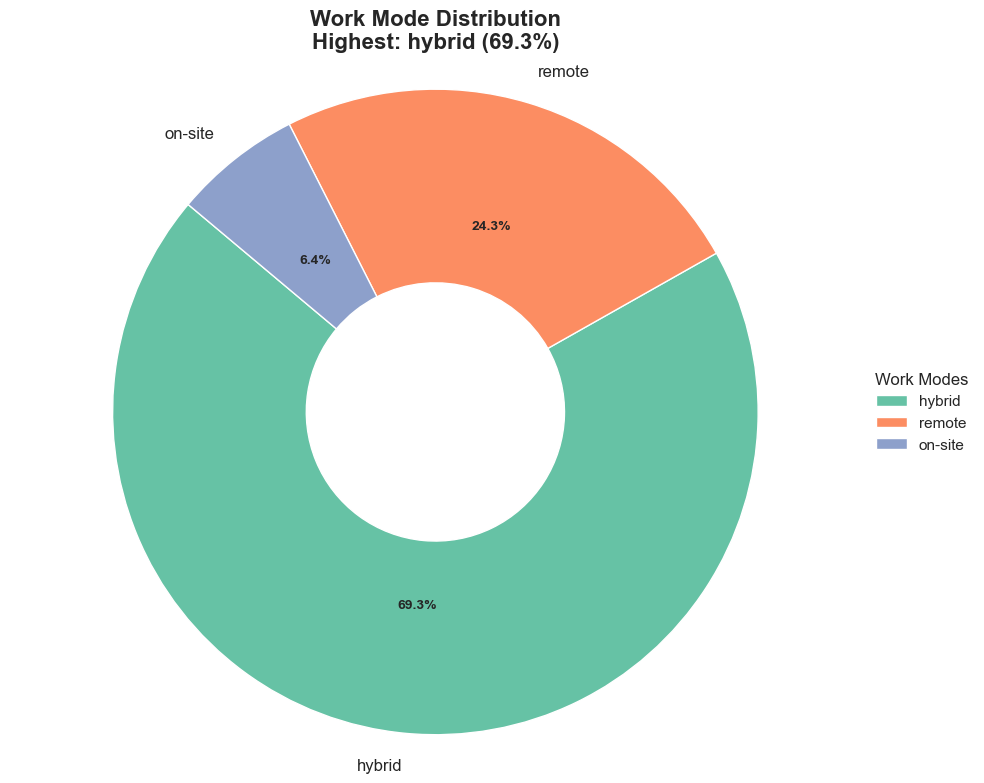

In [ ]:
# Filter out records where Work_Mode is 'Unknown' or 'Unspecified'
df_cleaned = df[~df['Work_Mode'].isin(['Unknown', 'Unspecified'])]

# Get the work mode distribution
work_mode_counts = df_cleaned['Work_Mode'].value_counts()

# Get the highest work mode
highest_work_mode = work_mode_counts.idxmax()

# Calculate percentages
work_mode_percentages = work_mode_counts / work_mode_counts.sum() * 100

# Create a pie chart
plt.figure(figsize=(10, 8))
colors = sns.color_palette('Set2', len(work_mode_counts))  # Different colors for each work mode
wedges, texts, autotexts = plt.pie(work_mode_percentages, labels=work_mode_counts.index, autopct='%1.1f%%',
                                   startangle=140, colors=colors, wedgeprops=dict(width=0.6))

# Enhance the appearance
plt.setp(autotexts, size=10, weight="bold")
plt.setp(texts, size=12)

# Add title with the highest work mode as headline
plt.title(f'Work Mode Distribution\nHighest: {highest_work_mode} ({work_mode_percentages[highest_work_mode]:.1f}%)',
          fontsize=16, fontweight='bold')

# Add a legend
plt.legend(wedges, work_mode_counts.index,
           title="Work Modes",
           loc="center left",
           bbox_to_anchor=(1, 0, 0.5, 1))

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

**Work Mode Breakdown**
Hybrid: Dominates the workplace with 69.3% of positions, showing a strong preference for flexible working arrangements
Remote: Represents 24.3% of positions, indicating a significant portion of fully remote opportunities
On-site: Makes up only 6.4% of positions, showing the lowest preference for traditional office-only work

**Key Insights**
The combined flexible work options (hybrid + remote) account for 93.6% of all positions
Traditional on-site work has become a minority option in the data-related job market
The high percentage of hybrid roles suggests employers are balancing the benefits of both in-person and remote work
This distribution clearly demonstrates the post-pandemic shift toward more flexible working arrangements in the data industry.



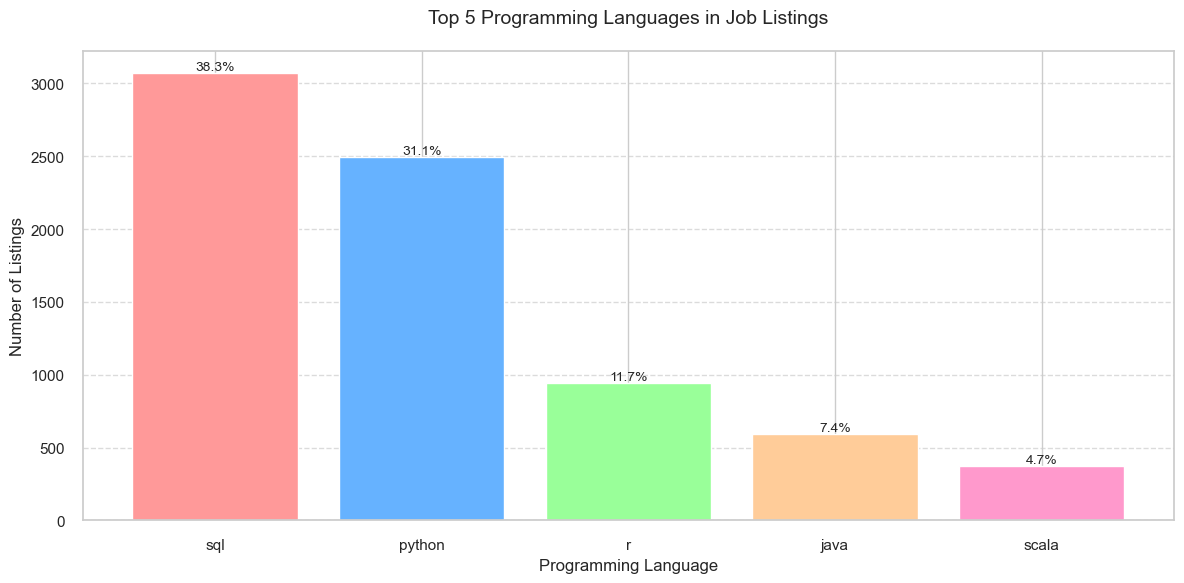

In [ ]:
# Function to process and count skills
def get_skill_counts(column_name):
    # Handle NaN values and split the strings
    skills = df[column_name].fillna('').str.split(', ')
    flattened_skills = list(itertools.chain.from_iterable(filter(None, skills)))
    return Counter(flattened_skills)

# Get programming languages counts
prog_langs = get_skill_counts('Programming_Languages')

# Get total number of mentions
total_mentions = sum(prog_langs.values())

# Create figure
plt.figure(figsize=(12, 6))

# Get top 5 languages
top_languages = dict(prog_langs.most_common(5))

# Create bar plot with custom colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
bars = plt.bar(top_languages.keys(), top_languages.values(), color=colors)

# Add percentage labels above each bar
for i, (lang, count) in enumerate(top_languages.items()):
    percentage = (count / total_mentions) * 100
    plt.text(i, count, f'{percentage:.1f}%',
             ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Top 5 Programming Languages in Job Listings', fontsize=14, pad=20)
plt.xlabel('Programming Language', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**Programming Language Distribution**
Most In-Demand Languages
SQL leads with 38.3% of job listings, showing the highest demand
Python follows closely at 31.1%, indicating strong preference for data analysis and machine learning
R ranks third at 11.7%, highlighting its importance in statistical analysis
Less Frequently Required
Java appears in 7.4% of listings
Scala shows the lowest demand at 4.7%

**Key Insights**
Database skills (SQL) remain the most crucial requirement in data-related positions
Python's high percentage reflects its versatility in data science and machine learning
Traditional programming languages like Java and Scala are less prioritized
The top two languages (SQL and Python) account for nearly 70% of all requirements
Statistical programming languages (R) maintain moderate demand
This distribution clearly shows the emphasis on data manipulation and analysis skills in the current job market.

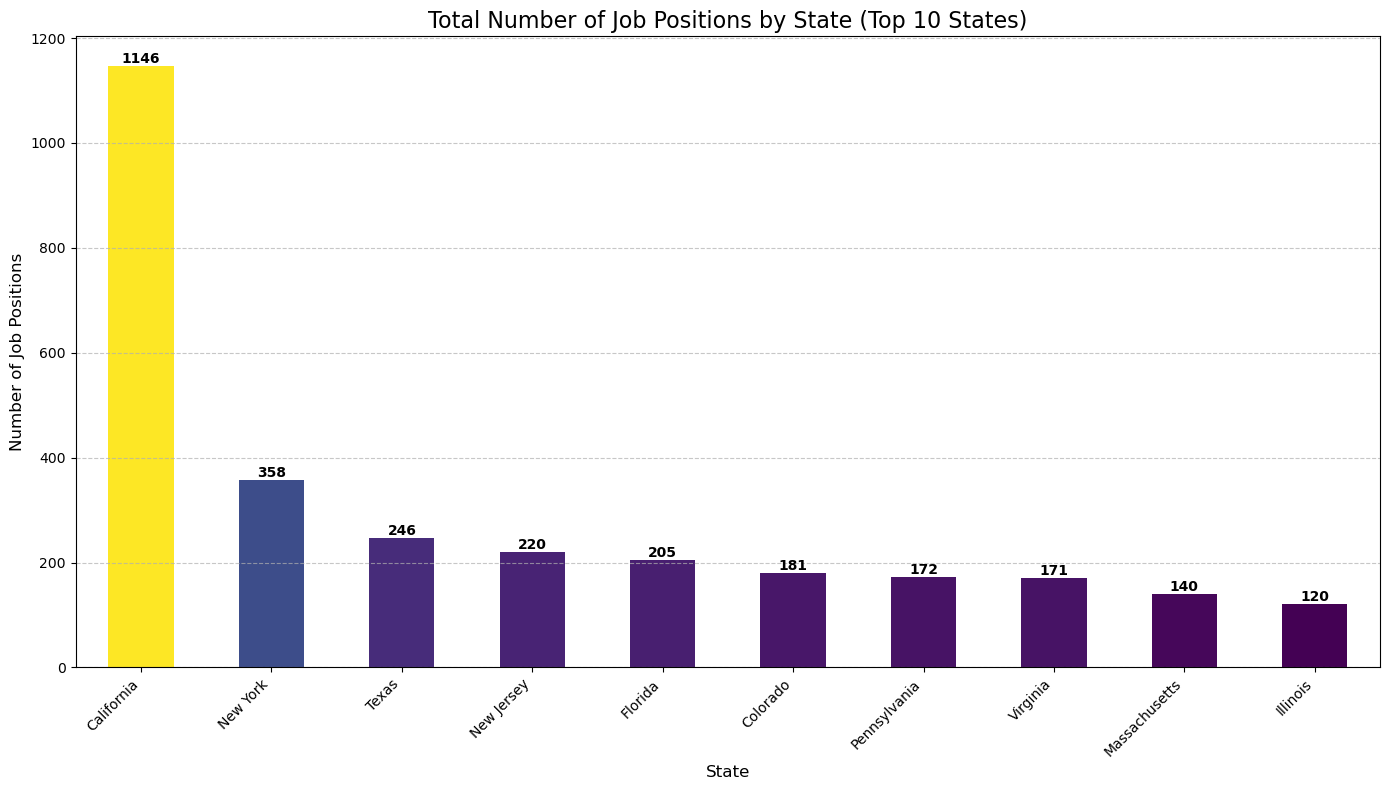

In [37]:
# Create a dictionary to map state abbreviations to full names
state_names = {
    'CA': 'California',
    'NY': 'New York',
    'NJ': 'New Jersey',
    'TX': 'Texas',
    'FL': 'Florida',
    'IL': 'Illinois',
    'GA': 'Georgia',
    'CO': 'Colorado',
    'PA': 'Pennsylvania',
    'MA': 'Massachusetts',
    'NC': 'North Carolina',
    'VA': 'Virginia',
    'OH': 'Ohio'
}

# Count job positions for each state
state_job_totals = df['State'].value_counts()

# Get top 10 states
top_states = state_job_totals.head(10)

# Create a new series with full state names
top_states_full = pd.Series({state_names[state]: count for state, count in top_states.items()})

# Normalize the job counts to create a gradient of colors
norm = mcolors.Normalize(vmin=top_states_full.min(), vmax=top_states_full.max())
colors = cm.viridis(norm(top_states_full.values))

# Plotting a bar chart with shaded colors
plt.figure(figsize=(14, 8))
bars = top_states_full.plot(kind='bar', color=colors)
plt.title('Total Number of Job Positions by State (Top 10 States)', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Job Positions', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for i, v in enumerate(top_states_full):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

**State Distribution**
California leads significantly with 1,146 job positions
New York follows with 358 positions
Texas ranks third with 246 positions
New Jersey and Florida round out the top 5 with 220 and 205 positions respectively
The remaining states (Colorado, Pennsylvania, Virginia, Massachusetts, and Illinois) each have between 120-181 positions


**Key Observations**
There's a clear concentration of jobs in tech-heavy coastal states
California has more than triple the positions of the second-ranking state
The top three states account for nearly half of all positions

Statistics for Average Salary:
count      4120.000000
mean     145457.655536
std       39189.695370
min       51000.000000
25%      102659.000000
50%      148909.000000
75%      175713.500000
max      453850.000000
Name: Average_Salary, dtype: float64


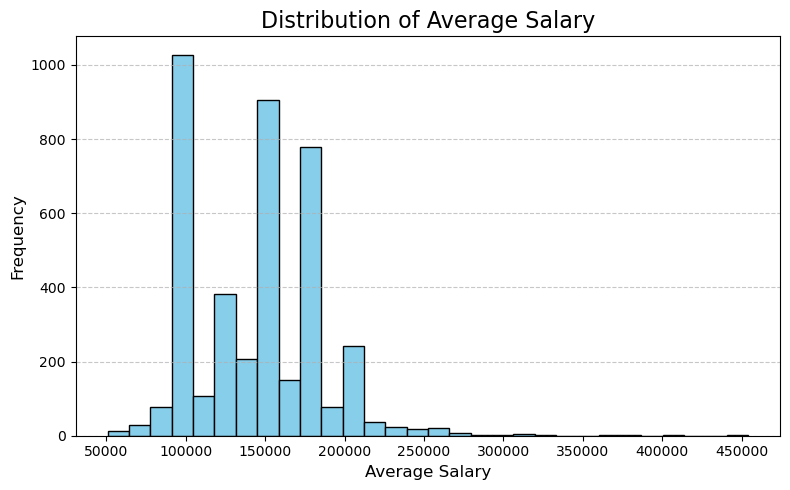

In [44]:
df['Average_Salary'] = (df['Min_Salary'] + df['Max_Salary']) / 2

# Display basic statistics
print("Statistics for Average Salary:")
print(df['Average_Salary'].describe())

# Plot a histogram for Average Salary
plt.figure(figsize=(8, 5))
plt.hist(df['Average_Salary'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Salary', fontsize=16)
plt.xlabel('Average Salary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The above histogram shows Salary Distribution graph shows most of the Job opportunities has average salary in between 60k to 250K irrespective of job position and job level.


